In [1]:
import time
import pandas as pd
import numpy as np
import solv_fzcp as sfzcp
import uvarprob as uvpr
from processor_new import Estimator

In [2]:
test_file = "./test/test_casado.csv"
# test_file = "./test/test11.csv"
# test_file = "../tst2.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
1,-0.5*x^2*(log(x))+5,0.2,7.0,0,0
2,-exp(-x)*sin(2*pi*x)+1,0.2,7.0,0,0
3,-(sqrt(x))*sin(x)+1,0.2,7.0,0,0
4,x*sin(x)+sin(10.0*x/3.0)+log(x)-0.84*x+1.3,0.2,7.0,0,0
5,x+sin(5.0*x),0.2,7.0,0,0
6,-x*sin(x)+5,0.2,7.0,0,0
7,sin(x)*cos(x)-1.5*(sin(x))^2.0+1.2,0.2,7.0,0,0
8,2*cos(x)+cos(2*x)+5,0.2,7.0,0,0
9,2.0*sin(x)*exp(-x),0.2,7.0,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []
bnb2_lipint_points_list = []
bnb2_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
from test import test_last

test_last(df, 1e-4, repeat=1, global_lip=True)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.701 & 0.737 & 0.517 & 0.391 & 0.509 & 0.331 & 0.313 & 0.090 & 0.077 \\
2 & 0.044 & 0.772 & 0.711 & 0.572 & 0.538 & 0.263 & 0.258 & 0.279 & 0.273 \\
3 & 0.266 & 0.592 & 0.540 & 0.329 & 0.310 & 0.261 & 0.256 & 0.176 & 0.234 \\
4 & 0.638 & 0.793 & 0.690 & 0.520 & 0.439 & 0.390 & 0.317 & 0.235 & 0.197 \\
5 & 0.306 & 0.412 & 0.296 & 0.288 & 0.272 & 0.183 & 0.141 & 0.108 & 0.111 \\
6 & 0.049 & 0.173 & 0.152 & 0.100 & 0.093 & 0.070 & 0.067 & 0.059 & 0.055 \\
7 & 0.487 & 0.420 & 0.384 & 0.382 & 0.375 & 0.233 & 0.223 & 0.155 & 0.145 \\
8 & 0.034 & 0.129 & 0.102 & 0.095 & 0.078 & 0.052 & 0.056 & 0.069 & 0.076 \\
9 & 0.236 & 2.534 & 2.549 & 0.417 & 0.396 & 1.011 & 0.992 & 0.237 & 0.226 \\
10 & 0.529 & 4.101 & 5.048 & 1.084 & 1.160 & 1.508 & 1.427 & 0.494 & 0.460 \\
11 & 1.651 & 45.777 & 33.121 & 13.954 & 4.623 & 114.501 & 21.097 & 6.848 & 1.834 \\
12 & 0.062 & 1.146 & 0.986 & 0.629 & 0.377 & 0.517 & 0.379 & 0.297 & 0.221 \\
13 & 1.709 &

In [9]:
from test import test_last

test_last(df, 1e-4, repeat=1, global_lip=False)

test.Index,IBB,PL_N,PI_N,QL_N,QI_N,PL_R,PI_R,QL_R,QI_R
1 & 0.250 & 0.403 & 0.343 & 0.410 & 0.367 & 0.168 & 0.102 & 0.091 & 0.079 \\
2 & 0.053 & 0.516 & 0.433 & 0.492 & 0.461 & 0.240 & 0.229 & 0.460 & 0.389 \\
3 & 0.294 & 0.944 & 0.688 & 0.736 & 0.577 & 0.191 & 0.181 & 0.223 & 0.177 \\
4 & 0.736 & 1.019 & 0.891 & 0.935 & 0.874 & 0.386 & 0.281 & 0.253 & 0.248 \\
5 & 0.319 & 0.586 & 0.334 & 0.606 & 0.391 & 0.162 & 0.124 & 0.141 & 0.128 \\
6 & 0.058 & 0.299 & 0.157 & 0.099 & 0.086 & 0.104 & 0.085 & 0.079 & 0.074 \\
7 & 0.530 & 0.713 & 0.540 & 0.753 & 0.689 & 0.254 & 0.220 & 0.283 & 0.206 \\
8 & 0.037 & 0.196 & 0.160 & 0.146 & 0.114 & 0.085 & 0.078 & 0.098 & 0.090 \\
9 & 0.240 & 0.736 & 0.871 & 0.649 & 0.549 & 0.304 & 0.275 & 0.235 & 0.145 \\
10 & 0.491 & 1.103 & 0.797 & 0.805 & 0.774 & 0.542 & 0.482 & 0.456 & 0.431 \\
11 & 1.618 & 1.042 & 0.788 & 1.056 & 0.958 & 0.599 & 0.456 & 0.628 & 0.472 \\
12 & 0.034 & 0.739 & 0.589 & 1.058 & 1.114 & 0.498 & 0.334 & 0.555 & 0.431 \\
13 & 1.777 & 1.858

In [10]:
import interval as ival


def get_full_interval(intervals):
    if len(intervals) == 0:
        return 'No root'
    else:
        if isinstance(intervals[0], tuple):
            return ival.Interval([intervals[0][0].x[0], intervals[-1][0].x[1]])
        else:
            return ival.Interval([intervals[0].x[0], intervals[-1].x[1]])


res_list = [0] * len(list(df.itertuples()))
for i, test in enumerate(df.itertuples()):
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': [], 'bnb2_pslint_points_list': [], 'bnb2_psl_points_list': [],
                             'bnb2_lipint_points_list': [],
                             'bnb2_lip_points_list': []}

    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lipint_points_list']), True)
    res = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=False,
                           estimator=Estimator.PSQE, reduction=1).first_crossing_zero_point
    res_list[i] = res
    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=2, reduction=1)
    # print('QI_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSQE, reduction=1)
    # print('QI_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    #
    # T1 = time.perf_counter()
    # qir = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSQE, reduction=1)
    # print('QL_R:', qir)
    # print('Full interval', get_full_interval(qir.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # plr = sfzcp.new_method(prob, symm=False, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSL, reduction=1)
    # print('PI_R:', plr.nsteps)
    # print('width of full interval', get_full_interval(plr.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    #
    # T1 = time.perf_counter()
    # plr = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=True,
    #                        estimator=Estimator.PSL, reduction=1)
    # print('PL_R:', plr.nsteps)
    # print('width of full interval', get_full_interval(plr.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)
    T1 = time.perf_counter()
    pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=False,
                           estimator=Estimator.PSQE, reduction=0)
    print('QL_N:', pln.nsteps)
    print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)

    T1 = time.perf_counter()
    pln = sfzcp.new_method(prob, symm=True, epsilon=(test.b - test.a) * 1e-4, global_lipschitz_interval=False,
                           estimator=Estimator.PSL, reduction=0)
    print('PL_N:', pln.nsteps)
    print('width of full interval', get_full_interval(pln.first_crossing_zero_point))
    T2 = time.perf_counter()
    print('time=', (T2 - T1) * 1000)

    # T1 = time.perf_counter()
    # ibb = sfzcp.cas(prob=prob, epsilon=(test.b - test.a) * (1e-4))
    # print('IBB:', ibb)
    # print('Full interval', get_full_interval(ibb.first_crossing_zero_point))
    # T2 = time.perf_counter()
    # print('time=', (T2 - T1) * 1000)

1
QL_N: 23
width of full interval [3.011, 3.012]
time= 0.3589589614421129
PL_N: 23
width of full interval [3.011, 3.012]
time= 0.2520409761928022
2
QL_N: 11
width of full interval No root
time= 0.35962503170594573
PL_N: 15
width of full interval No root
time= 0.339541002176702
3
QL_N: 20
width of full interval [1.175, 1.175]
time= 0.4521249793469906
PL_N: 22
width of full interval [1.175, 1.175]
time= 0.376083014998585
4
QL_N: 26
width of full interval [2.961, 2.961]
time= 0.5765419919043779
PL_N: 36
width of full interval [2.961, 2.961]
time= 0.6144169601611793
5
QL_N: 21
width of full interval [0.821, 0.821]
time= 0.2811250160448253
PL_N: 25
width of full interval [0.821, 0.821]
time= 0.2715419977903366
6
QL_N: 3
width of full interval No root
time= 0.08366699330508709
PL_N: 11
width of full interval No root
time= 0.14045799616724253
7
QL_N: 22
width of full interval [1.341, 1.341]
time= 0.5069170147180557
PL_N: 24
width of full interval [1.341, 1.341]
time= 0.42041699634864926
8
QL_

3.0116907710390746
1.1748624894704434
2.9607324702421582
0.8209239701115811
1.3409793858337893
3.141592657840757
1.2655389178881162
1.364646352973308
4.7830778323016725
3.2810986189396454
3.140841483068506
1.5707963237450722
1.968571239652619
1.1407136128825441
-9.140464101347806
0.14716146797654278
-9.817082028577747
0.09237963488105505
1.258342236748872
-2.094395102393274
1.0353963147820575
-0.8002122558746276


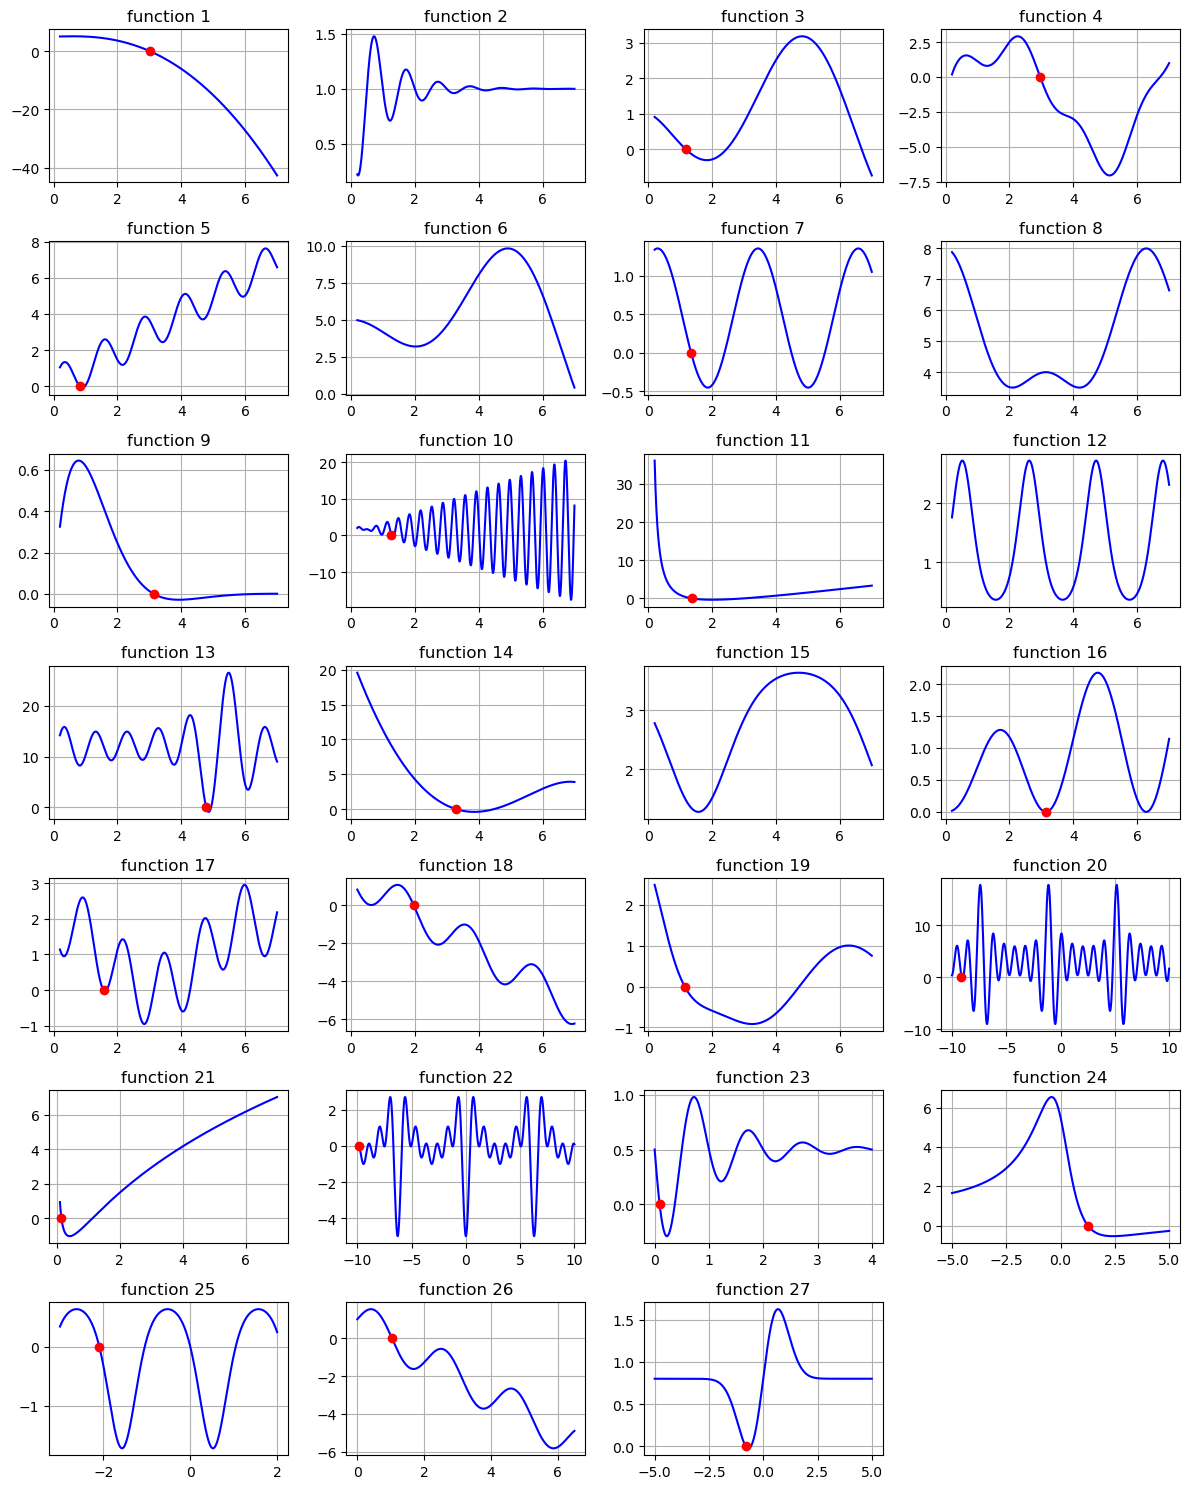

In [9]:
import matplotlib.pyplot as plt

cols = 4
fig, axes = plt.subplots(7, cols, figsize=(12, 15))


def sub_plot_problem(prob, tips, zero, npoints=1000):
    """
       Plots a problem
       
       Parameters
       ----------
       prob : UniVarProblem
           The problem to plot
       npoints : int
           number of points used to draw a plot
       """
    step = (prob.b - prob.a) / npoints
    ta = np.arange(prob.a, prob.b + step, step)
    num_points = len(ta)
    fta = np.empty([num_points])

    for i in range(num_points):
        fta[i] = prob.objective(ta[i])

    ax.plot(ta, fta, tips['function'])
    if len(zero) != 0:
        z = zero[0][0].mid()
        print(z)
        ax.scatter(z, 0, color='red', zorder=3)
        # ax.text(z-0.2, 0, rf'$x^*$', fontsize=12, ha='center', color='red')
    # ax.ylim([lb - d - legend, ub + d])


for i, test in enumerate(df.itertuples()):
    ax = axes[i // cols, i % cols]
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    sub_plot_problem(prob, {'function': 'b-'}, res_list[i])
    ax.set_title(f'function {i + 1}')
    ax.grid(True)

# for j in range(len(df.itertuples()), cols * 7):
fig.delaxes(axes.flatten()[27])

plt.tight_layout()
# plt.show()
plt.savefig('./all_funs.png', dpi=500)
